# K-Means Clustering Unsupervised Practice
    # Written By:     Dr Muhammad Asif Assistant

    # Email:          asifbwp78654@gmail.com

    # Date:           21-09-23  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# import data into features
X = df[['age', 'fare']]
X.age.fillna(value = X['age'].mean(), inplace=True)     # Remove Nan

# scaled data
scaler = StandardScaler()
# Normalization
X_scaled = scaler.fit_transform(X)

# Clustering
model = KMeans(n_clusters=5)
model.fit(X_scaled)

# Assign cluster lables to the data
df['cluster'] = model.labels_

C:\Users\LAPTOP INSIDE\AppData\Local\Temp\ipykernel_11608\1626157500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.age.fillna(value = X['age'].mean(), inplace=True)     # Remove Nan
c:\Users\LAPTOP INSIDE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [4]:
df['cluster'].unique()

array([1, 3, 0, 4, 2])

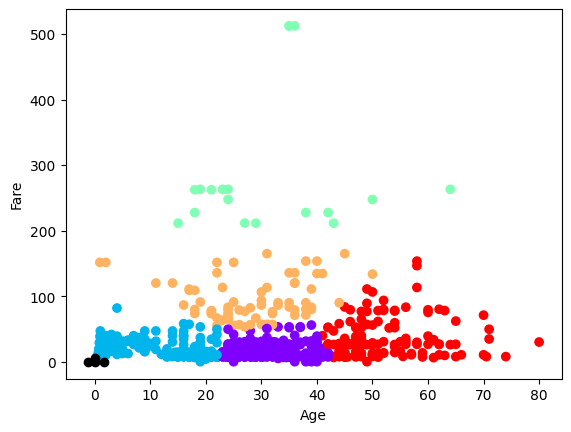

In [5]:
plt.scatter(df['age'], df['fare'], c = df['cluster'], cmap='rainbow')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='black')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [6]:
pip install mpl_toolkits # for 3D Ploting

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


# Plotly ky through plots then show individual clusters Assignmant

In [7]:
import plotly.express as px
fig = px.scatter(df, x='age', y='fare', color='cluster')
fig.show()

In [8]:
import plotly.express as px
fig = px.scatter_3d(df, x='age', y='fare', z='pclass', color='cluster')
fig.show()

In [9]:
fig = px.parallel_coordinates(df, color='cluster', title='Titanic Clusters')
fig.show()

In [10]:
pip install joblib

In [11]:
# Saving the Model
import joblib
joblib.dump(model,'KMeansClustering.joblib')

['KMeansClustering.joblib']

In [12]:
# Load the save model
modele_loaded = joblib.load('KMeansClustering.joblib')

In [13]:
import seaborn as sns
df_1 = sns.load_dataset('tips')
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [14]:
df_1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [15]:
df_1.describe

<bound method NDFrame.describe of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_1['smoker'])
df_1['smoker'] = le.transform(df_1['smoker'])

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_1['day'])
df_1['day'] = le.transform(df_1['day'])


le.fit(df_1['time'])
df_1['time'] = le.transform(df_1['time'])

In [19]:
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,2,0,2
1,10.34,1.66,Male,0,2,0,3
2,21.01,3.50,Male,0,2,0,3
3,23.68,3.31,Male,0,2,0,2
4,24.59,3.61,Female,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,1,0,3
240,27.18,2.00,Female,1,1,0,2
241,22.67,2.00,Male,1,1,0,2
242,17.82,1.75,Male,0,1,0,2


In [20]:
X = df_1.drop(columns=['sex'])
y = df_1['sex']

In [21]:
X.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,0,2,0,2
1,10.34,1.66,0,2,0,3
2,21.01,3.50,0,2,0,3
3,23.68,3.31,0,2,0,2
4,24.59,3.61,0,2,0,4


In [22]:
y.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

In [23]:
from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()
# model.fit(X,y)
# X = pd.get_dummies(X, columns=['sex'])
model = DecisionTreeClassifier()
model = model.fit(X,y)

In [24]:
joblib.dump(model, 'tipswalamodel.joblib')

['tipswalamodel.joblib']

In [25]:
model_1 = joblib.load('tipswalamodel.joblib')

In [27]:
import pickle
# Save the model
with open("model.pkl", 'wb') as f:
    pickle.dump(model, f)

# Load Model
with open("model.pkl", 'rb') as f:
    loaded_model = pickle.load(f)

In [28]:
# EDA
# Hypothesis
# Test / logic
# Data Visulization
# EDA Report 
# Data Wrangling Report
# final notebook present 